In [2]:
import pandas as pd
rf_feature_imp = pd.read_csv("../data/curated/RF_feature_importance.csv")
xgb_feature_imp = pd.read_csv('../data/curated/feature_importance_xgboost.csv')   

In [3]:
rf_feature_imp.rename(columns={'Unnamed: 0': 'Feature'}, inplace=True)
rf_feature_imp.head(5)


,Feature,importance
0,Baths,0.203269
1,Beds,0.157216
2,SA2 code_x,0.141317
3,Top 10%,0.061924
4,HHS_2036,0.048766


In [4]:
xgb_feature_imp = xgb_feature_imp.drop("Unnamed: 0", axis=1)
xgb_feature_imp.head(5)

,Feature,Importance
0,Beds,0.018021
1,Baths,0.071697
2,Parking,0.004923
3,chg_flag,0.000062
4,ste_code,0.000000


In [5]:
# Correct way to rename without reassigning
rf_feature_imp.rename(columns={'importance': 'rf_importance'}, inplace=True)
xgb_feature_imp.rename(columns={'Importance': 'xgb_importance'}, inplace=True)

# Now you can merge without issues
combined_feature_imp = pd.merge(rf_feature_imp, xgb_feature_imp, on='Feature', how='outer')

# Fill NaN values with 0 (in case a feature is present in one model but not the other)
combined_feature_imp.fillna(0, inplace=True)
# Calculate an aggregated importance score (e.g., average of RF and XGB importances)
combined_feature_imp['avg_importance'] = (combined_feature_imp['rf_importance'] + combined_feature_imp['xgb_importance']) / 2

# Sort by the aggregated importance score in descending order
combined_feature_imp = combined_feature_imp.sort_values(by='avg_importance', ascending=False)

# Select the top 10 features
top_10_features = combined_feature_imp.head(10)
                                            
# Rename 'SA2 code_x' to 'SA2 Code'
top_10_features['Feature'] = top_10_features['Feature'].replace('SA2 code_x', 'SA2 Code')

# Display the top 10 features
top_10_features

/var/folders/9c/2vbsxdnd7k7_tnzhl33znmpm0000gp/T/ipykernel_5892/967585568.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_features['Feature'] = top_10_features['Feature'].replace('SA2 code_x', 'SA2 Code')


,Feature,rf_importance,xgb_importance,avg_importance
2,SA2 Code,0.141317,0.144212,0.142764
0,Baths,0.203269,0.071697,0.137483
1,Beds,0.157216,0.018021,0.087619
11,Mean,0.021493,0.060716,0.041105
3,Top 10%,0.061924,0.010491,0.036207
4,HHS_2036,0.048766,0.021432,0.035099
13,Highest Quartile,0.015704,0.053222,0.034463
5,cbd_distance_km,0.042036,0.006919,0.024478
17,Gini coefficient,0.008985,0.036351,0.022668
7,distance_to_closest_school,0.030947,0.002116,0.016532


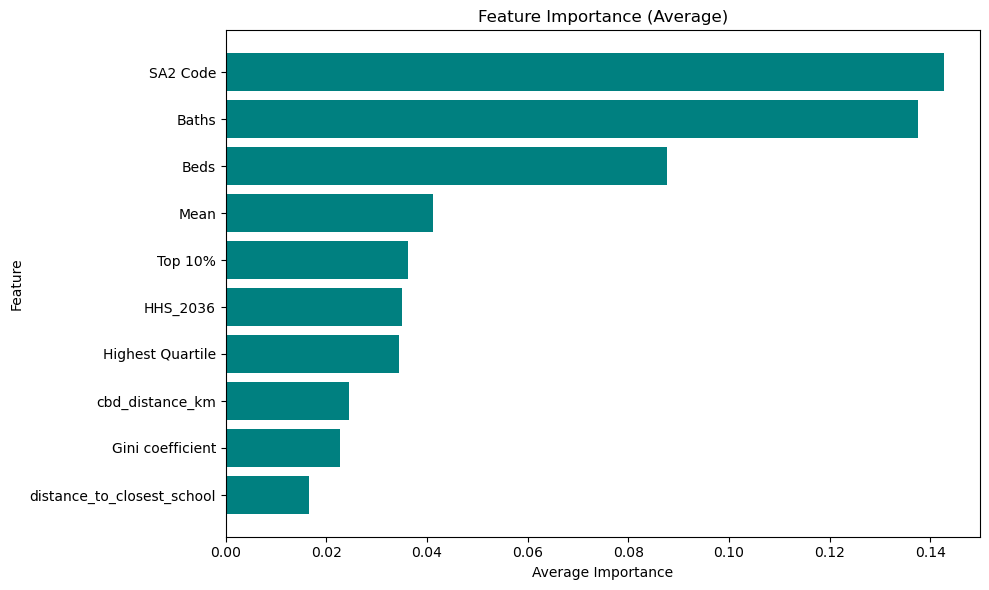

In [6]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['avg_importance'], color='teal')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Average)')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.tight_layout()
plt.savefig("../plots/top_10_features.jpg")
# Show the plot
plt.show()


In [7]:
top_10_features.to_csv("../data/curated/top_10")